# HW1 - Amazon dataset

## Set Up!

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_array
import numpy as np
from sklearn.preprocessing import normalize

## Loading data

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Amazon Data/AMAZON_FASHION.csv', names=['item','user','rating','timestamp'], header=0)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883635 entries, 0 to 883634
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       883635 non-null  object 
 1   user       883635 non-null  object 
 2   rating     883635 non-null  float64
 3   timestamp  883635 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.0+ MB


In [ ]:
ratings.head()

,item,user,rating,timestamp
0,7106116521,A3DDWDH9PX2YX2,2.0,1411862400
1,7106116521,A2MWC41EW7XL15,4.0,1408924800
2,7106116521,A2UH2QQ275NV45,2.0,1408838400
3,7106116521,A89F3LQADZBS5,3.0,1406419200
4,7106116521,A29HLOUW0NS0EH,5.0,1405728000


In [ ]:
meta = pd.read_json('/content/drive/MyDrive/Amazon Data/meta_AMAZON_FASHION.json', orient='records', lines=True)
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186637 entries, 0 to 186636
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   title            186632 non-null  object
 1   brand            139957 non-null  object
 2   feature          123875 non-null  object
 3   rank             180222 non-null  object
 4   date             185001 non-null  object
 5   asin             186637 non-null  object
 6   imageURL         132017 non-null  object
 7   imageURLHighRes  132017 non-null  object
 8   description      15869 non-null   object
 9   price            17799 non-null   object
 10  also_view        11595 non-null   object
 11  also_buy         21642 non-null   object
 12  fit              4831 non-null    object
 13  details          885 non-null     object
 14  similar_item     317 non-null     object
 15  tech1            97 non-null      object
dtypes: object(16)
memory usage: 22.8+ MB


In [ ]:
meta.head()

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Statistics




*   How many items are in the data set? There are 186189 items in the data set!
* How many users? There are 749232 users!
* How many ratings? There are 883635 ratings!

In [ ]:
ratings[['user', 'item']].nunique()

user    749232
item    186189
dtype: int64

In [ ]:
len(ratings)

883635

User Activity

---


* What is the distribution of ratings-per-user?

First we have to find the rating count and mean of each user!

In [ ]:
user_stats = ratings.groupby('user')['rating'].agg(['count', 'mean'])
user_stats

,count,mean
user,,
A0007604Q2582KFW7N4B,1,5.0
A0010606488RW7ZH6EP7,1,1.0
A001152055E9KVRHH96L,1,1.0
A00181966XZUX7KEGYLH,1,3.0
A00205926S885DTOYMX6,1,5.0
...,...,...
AZZYFFDBSSBJC,1,3.0
AZZYVTX23JWKM,1,5.0
AZZYVURSF9KK6,1,5.0


Here is the distribution with the hist plot!

<Axes: ylabel='Frequency'>

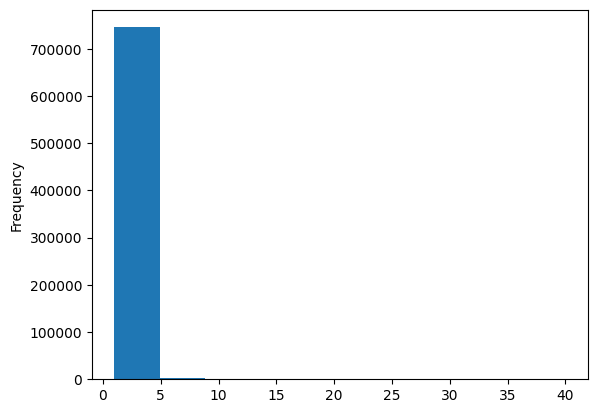

In [ ]:
user_stats['count'].plot.hist()

Here is the distribution with ecdf plot!

<Axes: xlabel='count', ylabel='Proportion'>

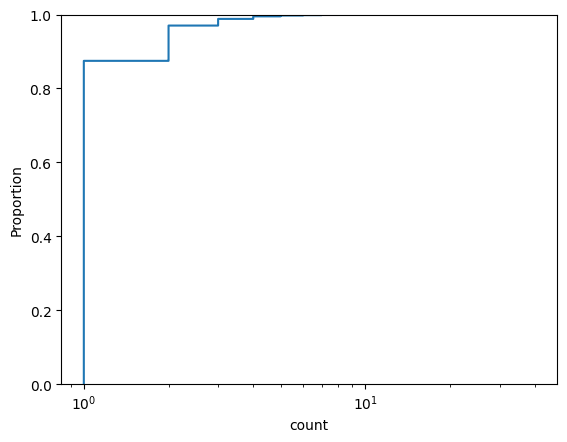

In [ ]:
sns.ecdfplot(x=user_stats['count'], log_scale=True)


Item Statistics

---


*   What is the item popularity curve (the distribution of ratings-per-item)?




First we have to find the rating count, mean, and sum of each movie!

In [ ]:
item_stats = ratings.groupby('item')['rating'].agg(['count', 'mean','sum'])
item_stats

,count,mean,sum
item,,,
0764443682,1,5.000000,5.0
1291691480,1,5.000000,5.0
1940280001,1,5.000000,5.0
1940735033,7,4.857143,34.0
1940967805,1,5.000000,5.0
...,...,...,...
B01HJGXL4O,1,5.000000,5.0
B01HJGZVYW,1,4.000000,4.0
B01HJH7JY6,1,5.000000,5.0


Here is the distribution shown with ecdf plot!

<Axes: xlabel='count', ylabel='Proportion'>

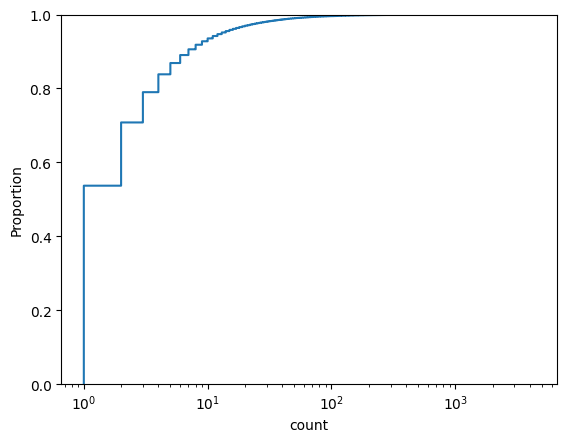

In [ ]:
sns.ecdfplot(x=item_stats['count'], log_scale=True)



*   What is the distribution of average ratings for items?




Here is the the distribution shown with hist plot!

<Axes: ylabel='Frequency'>

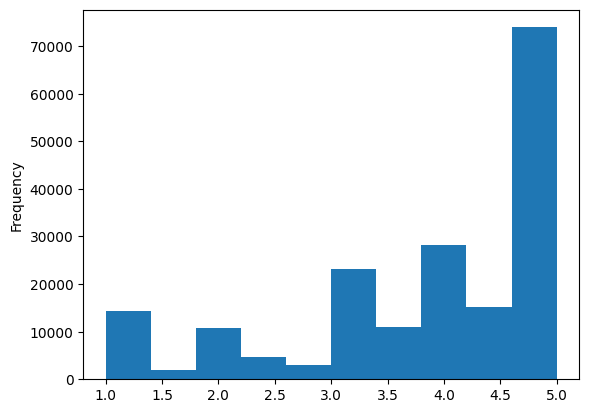

In [ ]:
item_stats['mean'].plot.hist()

## Non-personalized Recommendation



*   What are the 10 most popular items (the items with the most ratings)? Show the item ID, item title, and the number of ratings.



We can find the 10 most popular items regarding the number of ratings.

In [ ]:
item_stats['count'].nlargest(10)

item
B000V0IBDM    4384
B000KPIHQ4    4375
B00I0VHS10    3889
B00RLSCLJM    3638
B000PHANNM    2572
B000YFSR5G    2538
B00201ER88    2206
B00GXE331K    2027
B000P0X15G    1928
B00XT15P8E    1855
Name: count, dtype: int64

We join the item_stats dataframe with the meta data dataframe to be able to show the title of the items!

In [ ]:
item_stats

,count,mean,sum
item,,,
0764443682,1,5.000000,5.0
1291691480,1,5.000000,5.0
1940280001,1,5.000000,5.0
1940735033,7,4.857143,34.0
1940967805,1,5.000000,5.0
...,...,...,...
B01HJGXL4O,1,5.000000,5.0
B01HJGZVYW,1,4.000000,4.0
B01HJH7JY6,1,5.000000,5.0


In [ ]:
item_ranks = meta[['title','asin']].join(item_stats, on = 'asin')
item_ranks

,title,asin,count,mean,sum
0,Slime Time Fall Fest [With CDROM and Collector...,0764443682,1.0,5.000000,5.0
1,XCC Qi promise new spider snake preparing men'...,1291691480,1.0,5.000000,5.0
2,Magical Things I Really Do Do Too!,1940280001,1.0,5.000000,5.0
3,"Ashes to Ashes, Oranges to Oranges",1940735033,7.0,4.857143,34.0
4,Aether & Empire #1 - 2016 First Printing Comic...,1940967805,1.0,5.000000,5.0
...,...,...,...,...,...
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,B01HJGXL4O,1.0,5.000000,5.0
186633,Microcosm Retro Vintage Black Crochet Lace One...,B01HJHF97K,1.0,3.000000,3.0
186634,Lookatool Classic Plain Vintage Army Military ...,B01HJGJ9LS,22.0,3.590909,79.0
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,B01HJHTH5U,8.0,4.625000,37.0


Here are the 10 movies with the most ratings!

In [ ]:
item_ranks[['asin','title','count']].nlargest(10,'count')

,asin,title,count
3741,B000V0IBDM,Powerstep Pinnacle Orthotic Shoe Insoles,4384.0
2896,B000KPIHQ4,Powerstep Pinnacle Orthotic Shoe Insoles,4375.0
37617,B00I0VHS10,90 Degree By Reflex Power Flex Yoga Capri – Ca...,3889.0
71820,B00RLSCLJM,MJ Metals Jewelry 2mm to 10mm White Tungsten C...,3638.0
3383,B000PHANNM,"i play. Baby Boys Flap Sun Protection Hat, Aqu...",2572.0
3995,B000YFSR5G,Hanes Mens EcoSmart Fleece Sweatpant,2538.0
5886,B00201ER88,var aPageStart = (new Date()).getTime();\nvar ...,2206.0
34662,B00GXE331K,Best RFID Blocking Card Holder Case for Men an...,2027.0
3315,B000P0X15G,"i play. Girls' Baby Brim Sun Protection Hat, A...",1928.0
91870,B00XT15P8E,Marino Avenue Men’s Genuine Leather Ratchet Dr...,1855.0




*   What are the 10 items with the highest average ratings (with their titles and average ratings)?



Here are the 10 items with the highest average ratings!

In [ ]:
item_ranks[['asin','title','count','mean']].nlargest(10,'mean')

,asin,title,count,mean
0,0764443682,Slime Time Fall Fest [With CDROM and Collector...,1.0,5.0
1,1291691480,XCC Qi promise new spider snake preparing men'...,1.0,5.0
2,1940280001,Magical Things I Really Do Do Too!,1.0,5.0
4,1940967805,Aether & Empire #1 - 2016 First Printing Comic...,1.0,5.0
5,1942705034,"365 Affirmations for a Year of Love, Peace & P...",1.0,5.0
7,5378828716,Womens Sexy Sleeveless Camouflage Print Casual...,1.0,5.0
8,6041002984,Sevendayz Men's Shady Records Eminem Hoodie Ho...,1.0,5.0
9,630456984X,Dante's Peak - Laserdisc,1.0,5.0
11,8037200124,Envirosax Kids Series Jessie & Lulu,1.0,5.0
12,8037200221,Envirosax Greengrocer Series Bag 7 Guava,1.0,5.0


* What are the 10 items with the highest damped average ratings, with a damping factor of 5?

First we calculate the damped_mean for each movie using the sum and the mean columns!

In [ ]:
item_ranks['damped_mean'] = item_ranks['sum'] + (5 * ratings['rating'].mean()) / (item_ranks['count'] + 5)
item_ranks.head()

,title,asin,count,mean,sum,damped_mean
0,Slime Time Fall Fest [With CDROM and Collector...,0764443682,1.0,5.000000,5.0,8.255782
1,XCC Qi promise new spider snake preparing men'...,1291691480,1.0,5.000000,5.0,8.255782
2,Magical Things I Really Do Do Too!,1940280001,1.0,5.000000,5.0,8.255782
3,"Ashes to Ashes, Oranges to Oranges",1940735033,7.0,4.857143,34.0,35.627891
4,Aether & Empire #1 - 2016 First Printing Comic...,1940967805,1.0,5.000000,5.0,8.255782


Here are the 10 items with the highest damped_mean ratings!

In [ ]:
item_ranks[['asin','title','count','mean','damped_mean',]].nlargest(10,'damped_mean')

,asin,title,count,mean,damped_mean
3741,B000V0IBDM,Powerstep Pinnacle Orthotic Shoe Insoles,4384.0,4.515739,19797.004451
2896,B000KPIHQ4,Powerstep Pinnacle Orthotic Shoe Insoles,4375.0,4.517943,19766.004460
71820,B00RLSCLJM,MJ Metals Jewelry 2mm to 10mm White Tungsten C...,3638.0,4.826003,17557.005362
37617,B00I0VHS10,90 Degree By Reflex Power Flex Yoga Capri – Ca...,3889.0,4.443816,17282.005017
3383,B000PHANNM,"i play. Baby Boys Flap Sun Protection Hat, Aqu...",2572.0,4.655132,11973.007580
5886,B00201ER88,var aPageStart = (new Date()).getTime();\nvar ...,2206.0,4.423844,9759.008835
3995,B000YFSR5G,Hanes Mens EcoSmart Fleece Sweatpant,2538.0,3.797872,9639.007682
91870,B00XT15P8E,Marino Avenue Men’s Genuine Leather Ratchet Dr...,1855.0,4.727224,8769.010503
34662,B00GXE331K,Best RFID Blocking Card Holder Case for Men an...,2027.0,4.234336,8583.009614
3315,B000P0X15G,"i play. Girls' Baby Brim Sun Protection Hat, A...",1928.0,4.413382,8509.010106
